In [19]:
import geopandas
import pandas as pd
import glob
import datetime as dt
import re

In [20]:
def read_data(type, city = None):
    csvfiles = glob.glob(f"data{'/'+city if city else '/quebec'}/data-{type}-*.geojson")

    dfs = []

    for file in csvfiles:
        df = geopandas.read_file(file)

        # Find the timestamp in the filename.
        df["timestamp"] = re.search("[0-9]{4}\-[0-9]{2}\-[0-9]{2}\_[0-9]{4}", file)[0]

        # Format the timestring so it can be converted to a timestamp.
        df["timestamp"] = df["timestamp"].apply(lambda x: x[:-2] + ':' + x[-2:])
        df["timestamp"] = df["timestamp"].str.replace("_", " ")

        # Convert to timestamp, then from UTC to EST (minus 4 hours).
        df["timestamp"] = pd.to_datetime(df["timestamp"]) - dt.timedelta(hours = 4)
        
        dfs.append(df)
        
    data = pd.concat(dfs)

    return data

## Shapes

In [21]:
shapes = read_data("shapes")

shapes

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.187500,11061.622130,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 10:59:00
1,2899719,dd9d67f1-6333-497c-8ec4-77291f037d25,1,LAV-I-18195-1,782689.738281,10868.220674,"POLYGON ((-76.57129 45.54161, -76.57156 45.541...",2023-04-06 10:59:00
2,2899720,e7597d45-0678-44e8-a7ba-7a6ca514a342,1,LAV-I-18195-1,117197.269531,1353.738910,"POLYGON ((-76.66318 45.57150, -76.66401 45.572...",2023-04-06 10:59:00
3,2899721,5ce36fc5-405d-47c1-86e3-0a95478ac17f,1,LAV-I-18195-1,30018.644531,621.359927,"POLYGON ((-76.65784 45.60850, -76.65775 45.608...",2023-04-06 10:59:00
4,2899722,5e0a58a7-7948-4bc6-92f0-75593a203f9c,1,LAV-I-18195-1,29983.917969,621.000436,"POLYGON ((-76.65167 45.57708, -76.65159 45.577...",2023-04-06 10:59:00
...,...,...,...,...,...,...,...,...
2166,2983395,a06431cc-5d18-4f10-a348-a0c4f451bdaa,1,NOR-I-26199-1,52207.332031,1023.026684,"POLYGON ((-73.81313 45.45950, -73.81285 45.459...",2023-04-10 07:14:00
2167,2983396,1010ed6f-603e-43ee-84c5-8bf0bbdf70ef,1,NOR-I-26198-1,16393.941406,480.604216,"POLYGON ((-73.59892 45.55115, -73.59880 45.551...",2023-04-10 07:14:00
2168,2983397,d550adac-8b5e-44c7-a5ca-bd8f0f502e0d,1,NOR-I-26175-1,65730.406250,960.011359,"POLYGON ((-73.69608 45.47055, -73.69576 45.470...",2023-04-10 07:14:00
2169,2983399,a9a49497-b0ea-4dcd-952d-c21e7acce6b2,1,NOR-I-26202-1,20408.046875,525.775754,"POLYGON ((-73.91459 45.41658, -73.91518 45.416...",2023-04-10 07:14:00


In [22]:
shapes[shapes['OBJECTID'] == 2899718]

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 10:59:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:25:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:35:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:45:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-06 11:55:00
...,...,...,...,...,...,...,...,...
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-08 09:58:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-08 10:15:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-08 10:26:00
0,2899718,241f4ea2-a994-4b19-aef7-57532f411f81,1,LAV-I-18195-1,841753.1875,11061.62213,"POLYGON ((-76.65824 45.59690, -76.65841 45.596...",2023-04-08 10:37:00


<AxesSubplot:xlabel='timestamp'>

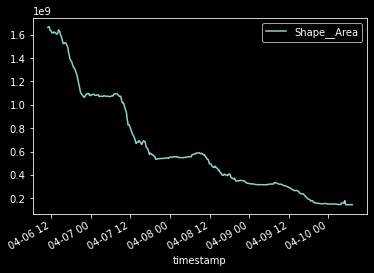

In [23]:
shapes.groupby("timestamp")["Shape__Area"].sum().to_frame().plot()

In [24]:
counts = shapes.pivot_table(index="timestamp", columns="panneMajeure", values="OBJECTID", aggfunc="count")
counts["sum"] = counts.sum(axis=1)

counts

panneMajeure,0,1,sum
timestamp,,,
2023-04-06 10:59:00,382,3618,4000
2023-04-06 11:25:00,373,3627,4000
2023-04-06 11:35:00,387,3613,4000
2023-04-06 11:45:00,394,3606,4000
2023-04-06 11:55:00,376,3624,4000
...,...,...,...
2023-04-10 06:22:00,213,1953,2166
2023-04-10 06:36:00,212,1952,2164
2023-04-10 06:47:00,212,1953,2165


## Points

In [25]:
points = read_data("points")

points

,OBJECTID,GlobalID,idInterruption,panneMajeure,geometry,timestamp
0,497654,5d1c47dc-1349-4a92-b8cd-075a8f8bd263,LAV-I-18472-1,1,POINT (-74.79422 45.66324),2023-04-06 10:59:00
1,497657,8f9c9311-698c-40fb-8c79-80cb9761b7a5,LAV-I-18195-1,1,POINT (-76.57370 45.57492),2023-04-06 10:59:00
2,497658,00225fe0-aab7-48ae-a438-6e8e7b46924f,LAV-I-18157-1,1,POINT (-75.48215 45.57836),2023-04-06 10:59:00
3,497665,0834d766-4b2c-47fa-9008-c283ac59d0eb,LAV-I-18089-1,1,POINT (-75.45042 45.55672),2023-04-06 10:59:00
4,497667,44b8383c-04e6-4555-a4f1-28dd760120ce,LAV-I-18429-1,1,POINT (-74.72894 45.71589),2023-04-06 10:59:00
...,...,...,...,...,...,...
1612,529456,972d122c-7c24-49f6-9e46-42f894071bd3,NOR-I-26198-1,1,POINT (-73.59831 45.55120),2023-04-10 07:14:00
1613,529458,522575b4-a634-4c29-b749-174248cb3aa6,NOR-I-26199-1,1,POINT (-73.81215 45.45955),2023-04-10 07:14:00
1614,529459,5327977b-db1d-4706-ae19-236953ae49d9,NOR-I-26175-1,1,POINT (-73.69395 45.46991),2023-04-10 07:14:00
1615,529460,110f1f46-6649-4d00-9dd3-f5c00fafe19f,NOR-I-26202-1,1,POINT (-73.91469 45.41723),2023-04-10 07:14:00


In [26]:
counts = points.pivot_table(index="timestamp", columns="panneMajeure", values="OBJECTID", aggfunc="count")
counts["sum"] = counts.sum(axis=1)

counts

panneMajeure,0,1,sum
timestamp,,,
2023-04-06 10:59:00,278,2680,2958
2023-04-06 11:25:00,270,2714,2984
2023-04-06 11:35:00,274,2731,3005
2023-04-06 11:45:00,285,2739,3024
2023-04-06 11:55:00,279,2766,3045
...,...,...,...
2023-04-10 06:22:00,35,1579,1614
2023-04-10 06:36:00,34,1578,1612
2023-04-10 06:47:00,34,1579,1613


<AxesSubplot:xlabel='timestamp'>

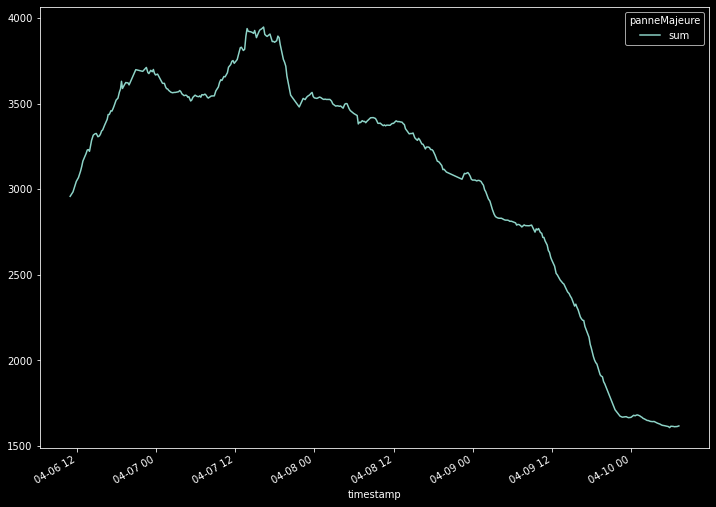

In [27]:
counts[["sum"]].plot(figsize=(12,9))

<AxesSubplot:>

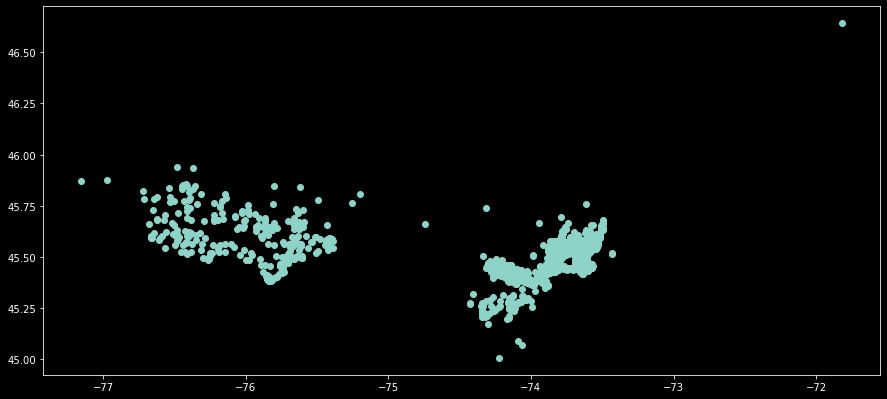

In [28]:
points.loc[points["timestamp"] == points["timestamp"].max(), :].plot(figsize=(15,15))

## Ottawa

In [29]:
ottaraw = read_data("shapes", "ottawa")

ottaraw.head(3)

,Name,tessellate,extrude,visibility,CUSTOMERS_OUT,EVENT_NUMBER,OFF_DATETIME,OUTAGE_AREA,ESTIMATED_RESTORE,RESTORE_DATETIME,...,NUM_CUST,XFMR_CUST,AREA_CUSTCOUNT,RUN_ID,OUTAGE_CUSTOMERS,CAUSE_CODE,DGROUP,DEVICE_HASH,geometry,timestamp
0,R00329314,-1.0,0.0,-1.0,,R00329314,2023-04-05T19:30:04,9,2023-04-06T12:00:00,,...,,,,3435772,1399,Undetermined,EAST,1df809c06fea86acdef246dc0dc0c1d3555fc67cba27ee...,"POLYGON Z ((-75.51727 45.29926 0.00000, -75.51...",2023-04-06 07:52:00
1,R00329314,-1.0,0.0,-1.0,,R00329314,2023-04-05T19:30:04,6,2023-04-06T12:00:00,,...,,,,3435772,1399,Undetermined,EAST,1df809c06fea86acdef246dc0dc0c1d3555fc67cba27ee...,"POLYGON Z ((-75.50290 45.30512 0.00000, -75.50...",2023-04-06 07:52:00
2,R00329314,-1.0,0.0,-1.0,,R00329314,2023-04-05T19:30:04,7,2023-04-06T12:00:00,,...,,,,3435772,1399,Undetermined,EAST,1df809c06fea86acdef246dc0dc0c1d3555fc67cba27ee...,"POLYGON Z ((-75.51013 45.30272 0.00000, -75.50...",2023-04-06 07:52:00


In [30]:
ottaraw["OUTAGE_CUSTOMERS"] = ottaraw["OUTAGE_CUSTOMERS"].astype(int)

<AxesSubplot:xlabel='timestamp'>

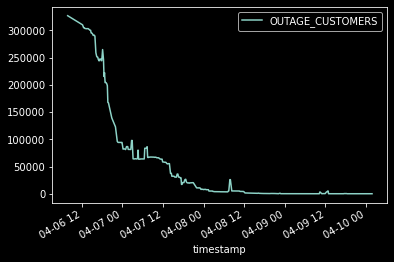

In [31]:
ottaraw.groupby("timestamp")["OUTAGE_CUSTOMERS"].sum().to_frame().plot()

<AxesSubplot:>

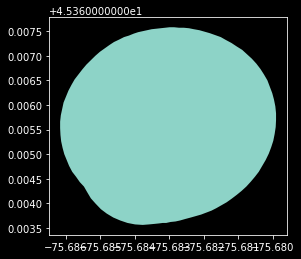

In [32]:
ottaraw.loc[ottaraw["timestamp"] == ottaraw["timestamp"].max(), :].plot()

## Montreal

In [33]:
montreal_raw = read_data("shapes", "montreal")

montreal_raw.head(3)

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899996,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 05:28:00
1,2900108,b866aeae-23a9-4988-a400-ef34461debe1,1,LAV-I-18133-1,26578.535156,608.983099,"POLYGON ((-73.86802 45.67285, -73.86866 45.673...",2023-04-07 05:28:00
2,2900598,638cbdc5-3f20-4e29-aafa-76b308635a65,1,NOR-I-13574-1,825740.675781,15759.550611,"POLYGON ((-73.64975 45.43130, -73.64969 45.431...",2023-04-07 05:28:00


In [34]:
montreal_raw

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp
0,2899996,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 05:28:00
1,2900108,b866aeae-23a9-4988-a400-ef34461debe1,1,LAV-I-18133-1,26578.535156,608.983099,"POLYGON ((-73.86802 45.67285, -73.86866 45.673...",2023-04-07 05:28:00
2,2900598,638cbdc5-3f20-4e29-aafa-76b308635a65,1,NOR-I-13574-1,825740.675781,15759.550611,"POLYGON ((-73.64975 45.43130, -73.64969 45.431...",2023-04-07 05:28:00
3,2900599,5e9987ad-ee5f-46f2-8035-b625203df3ac,1,NOR-I-13574-1,29832.406250,619.429502,"POLYGON ((-73.64219 45.43939, -73.64210 45.439...",2023-04-07 05:28:00
4,2900600,3262efc9-8888-4f9e-b0f2-dd928ad2b7c6,1,NOR-I-13537-1,10504.238281,389.375135,"POLYGON ((-73.65393 45.43272, -73.65379 45.432...",2023-04-07 05:28:00
...,...,...,...,...,...,...,...,...
1348,2983394,5288e982-ab31-4128-94f1-e65c0f624a24,1,NOR-I-26197-1,27188.597656,669.940274,"POLYGON ((-73.58508 45.53204, -73.58491 45.533...",2023-04-10 07:13:00
1349,2983395,a06431cc-5d18-4f10-a348-a0c4f451bdaa,1,NOR-I-26199-1,52207.332031,1023.026684,"POLYGON ((-73.81313 45.45950, -73.81285 45.459...",2023-04-10 07:13:00
1350,2983396,1010ed6f-603e-43ee-84c5-8bf0bbdf70ef,1,NOR-I-26198-1,16393.941406,480.604216,"POLYGON ((-73.59892 45.55115, -73.59880 45.551...",2023-04-10 07:13:00
1351,2983397,d550adac-8b5e-44c7-a5ca-bd8f0f502e0d,1,NOR-I-26175-1,65730.406250,960.011359,"POLYGON ((-73.69608 45.47055, -73.69576 45.470...",2023-04-10 07:13:00


In [47]:
boundaries = geopandas.read_file("data/boundaries.zip")
boundaries = boundaries.loc[boundaries["PRUID"] == "24", :].to_crs('EPSG:4326')

boundaries

,CTUID,DGUID,CTNAME,LANDAREA,PRUID,geometry
107,4210002.00,2021S05074210002.00,0002.00,1.3811,24,"POLYGON ((-71.24423 46.80284, -71.24347 46.802..."
108,4210003.00,2021S05074210003.00,0003.00,0.9632,24,"POLYGON ((-71.23958 46.80274, -71.23798 46.801..."
109,4210004.00,2021S05074210004.00,0004.00,0.5538,24,"POLYGON ((-71.20285 46.80772, -71.20357 46.806..."
110,4210005.00,2021S05074210005.00,0005.00,0.6836,24,"POLYGON ((-71.22188 46.80097, -71.22048 46.798..."
111,4210006.00,2021S05074210006.00,0006.00,0.4278,24,"POLYGON ((-71.23182 46.80129, -71.23218 46.801..."
...,...,...,...,...,...,...
6227,4210903.00,2021S05074210903.00,0903.00,96.8279,24,"POLYGON ((-71.42697 46.63612, -71.42629 46.635..."
6228,4470108.00,2021S05074470108.00,0108.00,78.7206,24,"POLYGON ((-72.66284 46.01004, -72.65742 46.006..."
6229,4621009.00,2021S05074621009.00,1009.00,80.0608,24,"POLYGON ((-73.57860 45.89826, -73.57823 45.897..."
6230,5050909.00,2021S05075050909.00,0909.00,289.5161,24,"POLYGON ((-75.25055 45.83207, -75.24987 45.817..."


In [48]:
montreal = geopandas.sjoin(montreal_raw, boundaries)

montreal

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp,index_right,CTUID,DGUID,CTNAME,LANDAREA,PRUID
0,2899996,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 05:28:00,4104,4620710.06,2021S05074620710.06,0710.06,2.0968,24
1,2900108,b866aeae-23a9-4988-a400-ef34461debe1,1,LAV-I-18133-1,26578.535156,608.983099,"POLYGON ((-73.86802 45.67285, -73.86866 45.673...",2023-04-07 05:28:00,4104,4620710.06,2021S05074620710.06,0710.06,2.0968,24
1601,2937254,446dc573-d148-4727-b232-b3c8fd7b8e00,1,LAV-I-22842-1,25356.886719,677.503045,"POLYGON ((-73.86928 45.67532, -73.86916 45.675...",2023-04-07 05:28:00,4104,4620710.06,2021S05074620710.06,0710.06,2.0968,24
1604,2937313,6a47ba8e-f2a5-402c-9672-2200fc923e0e,1,LAV-I-22901-1,16528.308594,505.835275,"POLYGON ((-73.86698 45.67613, -73.86711 45.676...",2023-04-07 05:28:00,4104,4620710.06,2021S05074620710.06,0710.06,2.0968,24
1759,2939038,beb1e39a-d2f1-47f4-aafb-e36a7754cd2f,1,LAV-I-23179-1,15906.210938,498.935971,"POLYGON ((-73.86907 45.67561, -73.86932 45.675...",2023-04-07 05:28:00,4104,4620710.06,2021S05074620710.06,0710.06,2.0968,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,2982918,80e82a7b-84d3-4405-85b0-684477c82969,1,LAV-I-33777-1,19828.359375,528.428082,"POLYGON ((-73.99194 45.75897, -73.99226 45.759...",2023-04-09 21:47:00,4474,4620786.00,2021S05074620786.00,0786.00,3.3672,24
1329,2982918,80e82a7b-84d3-4405-85b0-684477c82969,1,LAV-I-33777-1,19828.359375,528.428082,"POLYGON ((-73.99194 45.75897, -73.99226 45.759...",2023-04-09 22:21:00,4474,4620786.00,2021S05074620786.00,0786.00,3.3672,24
1320,2982918,80e82a7b-84d3-4405-85b0-684477c82969,1,LAV-I-33777-1,19828.359375,528.428082,"POLYGON ((-73.99194 45.75897, -73.99226 45.759...",2023-04-09 22:43:00,4474,4620786.00,2021S05074620786.00,0786.00,3.3672,24
1320,2982918,80e82a7b-84d3-4405-85b0-684477c82969,1,LAV-I-33777-1,19828.359375,528.428082,"POLYGON ((-73.99194 45.75897, -73.99226 45.759...",2023-04-09 22:56:00,4474,4620786.00,2021S05074620786.00,0786.00,3.3672,24


In [49]:
montreal["CTUID"] = montreal["CTUID"].astype(str)
montreal = montreal.set_index('CTUID')

montreal.head(3)

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp,index_right,DGUID,CTNAME,LANDAREA,PRUID
CTUID,,,,,,,,,,,,,
4620710.06,2899996,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 05:28:00,4104,2021S05074620710.06,0710.06,2.0968,24
4620710.06,2900108,b866aeae-23a9-4988-a400-ef34461debe1,1,LAV-I-18133-1,26578.535156,608.983099,"POLYGON ((-73.86802 45.67285, -73.86866 45.673...",2023-04-07 05:28:00,4104,2021S05074620710.06,0710.06,2.0968,24
4620710.06,2937254,446dc573-d148-4727-b232-b3c8fd7b8e00,1,LAV-I-22842-1,25356.886719,677.503045,"POLYGON ((-73.86928 45.67532, -73.86916 45.675...",2023-04-07 05:28:00,4104,2021S05074620710.06,0710.06,2.0968,24


In [50]:
census_data = pd.read_csv("data/census_data.csv", encoding="latin-1")

census_data

C:\Users\dexmc\AppData\Local\Temp\ipykernel_19864\1498708991.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  census_data = pd.read_csv("data/census_data.csv", encoding="latin-1")


,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,TNR_SF,TNR_LF,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,...,C2_COUNT_MEN+,SYMBOL.1,C3_COUNT_WOMEN+,SYMBOL.2,C10_RATE_TOTAL,SYMBOL.3,C11_RATE_MEN+,SYMBOL.4,C12_RATE_WOMEN+,SYMBOL.5
0,2021,2021S0503932,932.0,Census metropolitan area,Abbotsford - Mission,2.7,3.7,0,1,"Population, 2021",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
1,2021,2021S0503932,932.0,Census metropolitan area,Abbotsford - Mission,2.7,3.7,0,2,"Population, 2016",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
2,2021,2021S0503932,932.0,Census metropolitan area,Abbotsford - Mission,2.7,3.7,0,3,"Population percentage change, 2016 to 2021",...,NaN,...,NaN,...,8.4,NaN,NaN,...,NaN,...
3,2021,2021S0503932,932.0,Census metropolitan area,Abbotsford - Mission,2.7,3.7,0,4,Total private dwellings,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
4,2021,2021S0503932,932.0,Census metropolitan area,Abbotsford - Mission,2.7,3.7,0,5,Private dwellings occupied by usual residents,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16567402,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2627,Total - Eligibility and instruction in the min...,...,85.0,NaN,90.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN
16567403,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2628,Children eligible for instruction in the min...,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
16567404,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2629,Eligible children who have been instructed...,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
16567405,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2630,Eligible children who have not been instru...,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [56]:
montreal_census = census_data.loc[(census_data["GEO_LEVEL"] == "Census tract")]

montreal_census

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,TNR_SF,TNR_LF,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,...,C2_COUNT_MEN+,SYMBOL.1,C3_COUNT_WOMEN+,SYMBOL.2,C10_RATE_TOTAL,SYMBOL.3,C11_RATE_MEN+,SYMBOL.4,C12_RATE_WOMEN+,SYMBOL.5
2631,2021,2021S05079320001.00,9320001.0,Census tract,9320001.00,4.7,5.7,0,1,"Population, 2021",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
2632,2021,2021S05079320001.00,9320001.0,Census tract,9320001.00,4.7,5.7,0,2,"Population, 2016",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
2633,2021,2021S05079320001.00,9320001.0,Census tract,9320001.00,4.7,5.7,0,3,"Population percentage change, 2016 to 2021",...,NaN,...,NaN,...,0.0,NaN,NaN,...,NaN,...
2634,2021,2021S05079320001.00,9320001.0,Census tract,9320001.00,4.7,5.7,0,4,Total private dwellings,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
2635,2021,2021S05079320001.00,9320001.0,Census tract,9320001.00,4.7,5.7,0,5,Private dwellings occupied by usual residents,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16567402,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2627,Total - Eligibility and instruction in the min...,...,85.0,NaN,90.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN
16567403,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2628,Children eligible for instruction in the min...,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
16567404,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2629,Eligible children who have been instructed...,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
16567405,2021,2021S05078600190.00,8600190.0,Census tract,8600190.0,20.8,20.8,2020,2630,Eligible children who have not been instru...,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [57]:
list(montreal_census["CHARACTERISTIC_NAME"].unique())

['Population, 2021',
 'Population, 2016',
 'Population percentage change, 2016 to 2021',
 'Total private dwellings',
 'Private dwellings occupied by usual residents',
 'Population density per square kilometre',
 'Land area in square kilometres',
 'Total - Age groups of the population - 100% data',
 '  0 to 14 years',
 '    0 to 4 years',
 '    5 to 9 years',
 '    10 to 14 years',
 '  15 to 64 years',
 '    15 to 19 years',
 '    20 to 24 years',
 '    25 to 29 years',
 '    30 to 34 years',
 '    35 to 39 years',
 '    40 to 44 years',
 '    45 to 49 years',
 '    50 to 54 years',
 '    55 to 59 years',
 '    60 to 64 years',
 '  65 years and over',
 '    65 to 69 years',
 '    70 to 74 years',
 '    75 to 79 years',
 '    80 to 84 years',
 '    85 years and over',
 '      85 to 89 years',
 '      90 to 94 years',
 '      95 to 99 years',
 '      100 years and over',
 'Total - Distribution (%) of the population by broad age groups - 100% data',
 'Average age of the population',
 'Medi

In [58]:
montreal_income_data = montreal_census[montreal_census["CHARACTERISTIC_NAME"] == "  Median total income of household in 2020 ($)"]
montreal_income_data["ALT_GEO_CODE"] = montreal_income_data["ALT_GEO_CODE"].astype(str)
montreal_income_data = montreal_income_data.set_index("ALT_GEO_CODE")

montreal_income_data.head(3)

C:\Users\dexmc\AppData\Local\Temp\ipykernel_19864\2204507259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  montreal_income_data["ALT_GEO_CODE"] = montreal_income_data["ALT_GEO_CODE"].astype(str)


,CENSUS_YEAR,DGUID,GEO_LEVEL,GEO_NAME,TNR_SF,TNR_LF,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,...,C2_COUNT_MEN+,SYMBOL.1,C3_COUNT_WOMEN+,SYMBOL.2,C10_RATE_TOTAL,SYMBOL.3,C11_RATE_MEN+,SYMBOL.4,C12_RATE_WOMEN+,SYMBOL.5
ALT_GEO_CODE,,,,,,,,,,,,,,,,,,,,,
9320001.0,2021,2021S05079320001.00,Census tract,9320001.00,4.7,5.7,0,243,Median total income of household in 2020 ($),NaN,...,NaN,...,NaN,...,121000.0,NaN,NaN,...,NaN,...
9320002.0,2021,2021S05079320002.00,Census tract,9320002.00,2.8,4.8,0,243,Median total income of household in 2020 ($),NaN,...,NaN,...,NaN,...,85000.0,NaN,NaN,...,NaN,...
9320003.0,2021,2021S05079320003.00,Census tract,9320003.00,3.3,5.6,0,243,Median total income of household in 2020 ($),NaN,...,NaN,...,NaN,...,77000.0,NaN,NaN,...,NaN,...


In [59]:
montreal_joined = montreal.join(montreal_income_data[["C10_RATE_TOTAL"]]).dropna(subset="C10_RATE_TOTAL")

montreal_joined

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp,index_right,DGUID,CTNAME,LANDAREA,PRUID,C10_RATE_TOTAL
4500100.01,2957095,52dd6068-2ec7-40a7-953f-fdbaa305c0a4,1,SEI-I-30818-1,2.638150e+06,12525.266748,"POLYGON ((-72.78999 45.30859, -72.78999 45.307...",2023-04-07 10:39:00,6022,2021S05074500100.01,0100.01,44.5024,24,83000.0
4500100.01,2957095,52dd6068-2ec7-40a7-953f-fdbaa305c0a4,1,SEI-I-30818-1,2.638150e+06,12525.266748,"POLYGON ((-72.78999 45.30859, -72.78999 45.307...",2023-04-07 10:50:00,6022,2021S05074500100.01,0100.01,44.5024,24,83000.0
4500100.01,2957095,52dd6068-2ec7-40a7-953f-fdbaa305c0a4,1,SEI-I-30818-1,2.638150e+06,12525.266748,"POLYGON ((-72.78999 45.30859, -72.78999 45.307...",2023-04-07 11:02:00,6022,2021S05074500100.01,0100.01,44.5024,24,83000.0
4500100.01,2957095,52dd6068-2ec7-40a7-953f-fdbaa305c0a4,1,SEI-I-30818-1,2.638150e+06,12525.266748,"POLYGON ((-72.78999 45.30859, -72.78999 45.307...",2023-04-07 11:22:00,6022,2021S05074500100.01,0100.01,44.5024,24,83000.0
4500100.01,2957095,52dd6068-2ec7-40a7-953f-fdbaa305c0a4,1,SEI-I-30818-1,2.638150e+06,12525.266748,"POLYGON ((-72.78999 45.30859, -72.78999 45.307...",2023-04-07 11:36:00,6022,2021S05074500100.01,0100.01,44.5024,24,83000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621006.03,2962044,16b6ade6-2fac-49f1-8adc-e20006d17a5a,1,LAV-I-27700-1,6.221630e+05,6036.921502,"POLYGON ((-73.76603 45.81900, -73.76596 45.818...",2023-04-07 16:40:00,4310,2021S05074621006.03,1006.03,5.4171,24,86000.0
4621006.03,2963941,224fe45f-66e2-4a9a-986c-f506b340e0ac,1,LAV-I-27707-1,4.720304e+05,4812.433377,"POLYGON ((-73.73560 45.81533, -73.73498 45.815...",2023-04-07 16:40:00,4310,2021S05074621006.03,1006.03,5.4171,24,86000.0
4621006.03,2962044,16b6ade6-2fac-49f1-8adc-e20006d17a5a,1,LAV-I-27700-1,6.221630e+05,6036.921502,"POLYGON ((-73.76603 45.81900, -73.76596 45.818...",2023-04-07 16:51:00,4310,2021S05074621006.03,1006.03,5.4171,24,86000.0
4621006.03,2963941,224fe45f-66e2-4a9a-986c-f506b340e0ac,1,LAV-I-27707-1,4.720304e+05,4812.433377,"POLYGON ((-73.73560 45.81533, -73.73498 45.815...",2023-04-07 16:51:00,4310,2021S05074621006.03,1006.03,5.4171,24,86000.0


In [60]:
pivot = montreal_joined.loc[montreal_joined["timestamp"] == montreal_joined["timestamp"].min()].pivot_table(index="CTNAME", values=["C10_RATE_TOTAL", "Shape__Area"], aggfunc=["mean", "sum"])
pivot = pivot[[("mean", "C10_RATE_TOTAL"), ("sum", "Shape__Area")]]

pivot.sort_values(("sum", "Shape__Area"), ascending=False)

,mean,sum
,C10_RATE_TOTAL,Shape__Area
CTNAME,,
0758.03,134000.0,4.609080e+07
0758.04,146000.0,2.923054e+07
0758.05,131000.0,2.476377e+07
0756.03,120000.0,2.375170e+07
0758.06,102000.0,2.144547e+07
...,...,...
0826.06,80000.0,8.561098e+03
0825.05,69500.0,8.173859e+03


In [61]:
income_pivot = montreal_joined.pivot_table(index="CTNAME", values="C10_RATE_TOTAL", aggfunc="min")

richest = income_pivot.sort_values("C10_RATE_TOTAL", ascending=False).head(10).index.to_list()
poorest = income_pivot.sort_values("C10_RATE_TOTAL", ascending=True).head(10).index.to_list()

richest

['0710.09',
 '0855.04',
 '0055.02',
 '0470.03',
 '0462.02',
 '0677.11',
 '0828.05',
 '0903.11',
 '0758.04',
 '0521.05']

In [62]:
pivot_time = montreal_joined.pivot_table(columns="CTNAME", values="Shape__Area", index="timestamp", aggfunc="sum")
pivot_subset = pivot_time[richest + poorest]

pivot_subset

CTNAME,0710.09,0855.04,0055.02,0470.03,0462.02,0677.11,0828.05,0903.11,0758.04,0521.05,0066.02,0127.01,0112.02,0395.01,0097.02,0610.07,0287.01,0012.02,0223.01,0097.01
timestamp,,,,,,,,,,,,,,,,,,,,
2023-04-07 05:28:00,7.256905e+06,NaN,NaN,7.174717e+06,5.567995e+06,4.020415e+06,33443.425781,245464.425781,2.923054e+07,1.186131e+07,NaN,631353.089844,4.230235e+06,NaN,1.507218e+06,746957.554688,1.047325e+06,733941.089844,233167.277344,108150.53125
2023-04-07 09:38:00,6.759580e+06,NaN,NaN,7.174717e+06,5.567995e+06,4.136220e+06,33443.425781,245464.425781,2.923054e+07,1.186131e+07,NaN,631353.089844,4.230235e+06,NaN,1.507218e+06,746957.554688,1.047325e+06,733941.089844,233167.277344,108150.53125
2023-04-07 09:49:00,6.759580e+06,NaN,NaN,7.174717e+06,5.567995e+06,4.136220e+06,33443.425781,245464.425781,2.915824e+07,1.186131e+07,NaN,631353.089844,4.230235e+06,NaN,1.507218e+06,746957.554688,1.047325e+06,733941.089844,233167.277344,108150.53125
2023-04-07 10:00:00,6.759580e+06,NaN,NaN,7.174717e+06,5.567995e+06,4.136220e+06,33443.425781,245464.425781,2.915824e+07,1.186131e+07,NaN,631353.089844,4.230235e+06,NaN,1.507218e+06,746957.554688,1.047325e+06,733941.089844,233167.277344,108150.53125
2023-04-07 10:18:00,6.494029e+06,NaN,NaN,7.174717e+06,5.567995e+06,3.683179e+06,33443.425781,245464.425781,2.915824e+07,1.186131e+07,NaN,631353.089844,4.230235e+06,NaN,1.507218e+06,746957.554688,1.047325e+06,733941.089844,233167.277344,108150.53125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 06:15:00,NaN,NaN,NaN,5.251714e+05,1.858805e+06,NaN,NaN,NaN,4.725852e+06,1.067707e+06,NaN,41027.386719,NaN,13283.179688,NaN,NaN,2.375248e+04,29579.832031,NaN,NaN
2023-04-10 06:30:00,NaN,NaN,NaN,5.251714e+05,1.858805e+06,NaN,NaN,NaN,4.725852e+06,1.067707e+06,NaN,41027.386719,NaN,13283.179688,NaN,NaN,2.375248e+04,29579.832031,NaN,NaN
2023-04-10 06:41:00,NaN,NaN,NaN,5.251714e+05,1.880878e+06,NaN,NaN,NaN,4.725852e+06,1.067707e+06,NaN,41027.386719,NaN,13283.179688,NaN,NaN,2.375248e+04,29579.832031,NaN,NaN


In [63]:
pivot_subset.to_clipboard()

In [64]:
time_affected = montreal_joined.pivot_table(index="OBJECTID", values="timestamp", aggfunc=["min", "max"])
time_affected["duration"] = time_affected["max"] - time_affected["min"]
time_affected = time_affected[["duration"]]

time_affected = time_affected.join(montreal_joined.set_index("OBJECTID"))

time_affected

C:\Users\dexmc\AppData\Local\Temp\ipykernel_19864\1057222413.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  time_affected = time_affected.join(montreal_joined.set_index("OBJECTID"))


,"(duration, )",GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp,index_right,DGUID,CTNAME,LANDAREA,PRUID,C10_RATE_TOTAL
OBJECTID,,,,,,,,,,,,,,
2899996,0 days 14:29:00,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 05:28:00,4104,2021S05074620710.06,0710.06,2.0968,24,113000.0
2899996,0 days 14:29:00,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 09:38:00,4104,2021S05074620710.06,0710.06,2.0968,24,113000.0
2899996,0 days 14:29:00,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 09:49:00,4104,2021S05074620710.06,0710.06,2.0968,24,113000.0
2899996,0 days 14:29:00,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 10:00:00,4104,2021S05074620710.06,0710.06,2.0968,24,113000.0
2899996,0 days 14:29:00,14625829-f827-4404-ad8e-4e025b6d2f62,1,LAV-I-17813-1,11682.410156,413.125616,"POLYGON ((-73.86777 45.67885, -73.86771 45.679...",2023-04-07 10:18:00,4104,2021S05074620710.06,0710.06,2.0968,24,113000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983385,0 days 00:17:00,1f6a97fd-895e-48af-b143-6b1b18aed358,1,SEI-I-35720-1,25914.238281,599.082390,"POLYGON ((-74.16859 45.39337, -74.16836 45.393...",2023-04-10 07:13:00,1790,2021S05074620758.04,0758.04,15.4148,24,146000.0
2983392,0 days 00:00:00,808a9fbf-0f5d-4ad3-afa1-2cfb4cf38c73,1,SEI-I-35721-1,31365.015625,684.697624,"POLYGON ((-74.03119 45.42436, -74.03136 45.424...",2023-04-10 07:13:00,3744,2021S05074620756.03,0756.03,34.7030,24,120000.0
2983393,0 days 00:00:00,e42c88e9-f790-414a-bce4-5b69c6e849c7,1,LAV-I-34167-1,16516.164062,558.197065,"POLYGON ((-73.98518 45.50744, -73.98506 45.507...",2023-04-10 07:13:00,4793,2021S05074620732.01,0732.01,41.2187,24,94000.0


In [99]:
duration_pivot = time_affected.pivot_table(index="CTNAME", values=[('duration', '')], aggfunc="mean")
duration_pivot.columns = ["duration"]

duration_pivot

c:\Users\dexmc\anaconda3\envs\geo\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,duration
CTNAME,
0012.01,0 days 11:59:00
0012.02,1 days 09:09:26.989619377
0014.04,0 days 01:24:00
0055.01,0 days 11:10:15.937500
0055.02,0 days 01:58:00
...,...
0930.02,0 days 09:15:25.263157894
0930.03,0 days 04:10:00
1006.01,0 days 02:49:00


In [72]:
income_pivot = time_affected.pivot_table(index="CTNAME", values=["C10_RATE_TOTAL"], aggfunc="mean")

income_pivot

,C10_RATE_TOTAL
CTNAME,
0012.01,48400.0
0012.02,47600.0
0014.04,68000.0
0055.01,93000.0
0055.02,172000.0
...,...
0930.02,93000.0
0930.03,119000.0
1006.01,68000.0


In [92]:
both_pivot = income_pivot.join(duration_pivot)
both_pivot.columns = ["income", "duration"]
both_pivot["duration"] = both_pivot["duration"].dt.seconds

both_pivot = both_pivot.sort_values("duration", ascending=False)
both_pivot.loc[both_pivot.index.isin(richest), "category"] = "richest"
both_pivot.loc[both_pivot.index.isin(poorest), "category"] = "poorest"

both_pivot["income_category"] = pd.cut(both_pivot["income"], 7)

both_pivot["affected"] = both_pivot["duration"] * both_pivot[]

# both_pivot.groupby("income_category").mean()[["duration"]].to_clipboard()

<AxesSubplot:xlabel='timestamp'>

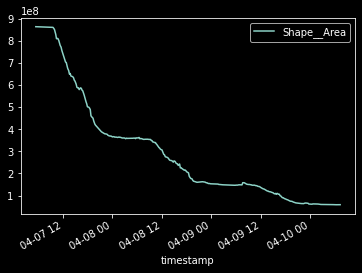

In [74]:
montreal_raw.groupby("timestamp")["Shape__Area"].sum().to_frame().plot()

In [80]:
montreal_joined.groupby("CTNAME").mean()[["Shape__Area"]]

,Shape__Area
CTNAME,
0012.01,284217.808594
0012.02,130103.518828
0014.04,171294.113281
0055.01,25979.912476
0055.02,13354.480469
...,...
0930.02,27137.077303
0930.03,203560.851562
1006.01,29471.808594


In [103]:
montreal_joined2 = montreal_joined.set_index("CTNAME").join(duration_pivot)
montreal_joined2["duration"] = montreal_joined2["duration"].dt.seconds

montreal_joined2.head(3)

,OBJECTID,GlobalID,panneMajeure,idInterruption,Shape__Area,Shape__Length,geometry,timestamp,index_right,DGUID,LANDAREA,PRUID,C10_RATE_TOTAL,duration
CTNAME,,,,,,,,,,,,,,
0012.01,2948455,2183dd1c-0083-4a31-b719-f15e78420321,1,NOR-I-18790-1,284217.808594,2920.04311,"POLYGON ((-73.54022 45.57773, -73.53993 45.578...",2023-04-07 05:28:00,2503,2021S05074620012.01,0.2378,24,48400.0,43140
0012.01,2948455,2183dd1c-0083-4a31-b719-f15e78420321,1,NOR-I-18790-1,284217.808594,2920.04311,"POLYGON ((-73.54022 45.57773, -73.53993 45.578...",2023-04-07 09:38:00,2503,2021S05074620012.01,0.2378,24,48400.0,43140
0012.01,2948455,2183dd1c-0083-4a31-b719-f15e78420321,1,NOR-I-18790-1,284217.808594,2920.04311,"POLYGON ((-73.54022 45.57773, -73.53993 45.578...",2023-04-07 09:49:00,2503,2021S05074620012.01,0.2378,24,48400.0,43140


In [104]:
montreal_joined2["duration"].corr(montreal_joined2["C10_RATE_TOTAL"])

-0.06243563855813765

In [105]:
ottawa_joined = geopandas.sjoin(ottaraw, boundaries)

ottawa_joined

,Name,tessellate,extrude,visibility,CUSTOMERS_OUT,EVENT_NUMBER,OFF_DATETIME,OUTAGE_AREA,ESTIMATED_RESTORE,RESTORE_DATETIME,...,DGROUP,DEVICE_HASH,geometry,timestamp,index_right,CTUID,DGUID,CTNAME,LANDAREA,PRUID
218,R00330724,-1.0,0.0,-1.0,,R00330724,2023-04-07T14:39:10,1,2023-04-07T17:00:00,,...,EAST,f0cb4bbb063f8643758ffaafbde98d57baa5c21e4ae0db...,"POLYGON Z ((-75.67822 45.43804 0.00000, -75.67...",2023-04-07 14:48:00,846,5050600.00,2021S05075050600.00,0600.00,1.9606,24
53,R00330724,-1.0,0.0,-1.0,,R00330724,2023-04-07T14:39:10,1,2023-04-07T14:42:00,,...,EAST,f0cb4bbb063f8643758ffaafbde98d57baa5c21e4ae0db...,"POLYGON Z ((-75.67822 45.43804 0.00000, -75.67...",2023-04-07 14:57:00,846,5050600.00,2021S05075050600.00,0600.00,1.9606,24


In [108]:
time_affected = ottawa_joined.pivot_table(index="EVENT_NUMBER", values="timestamp", aggfunc=["min", "max"])
time_affected["duration"] = time_affected["max"] - time_affected["min"]
time_affected = time_affected[["duration"]]

time_affected = time_affected.join(ottawa_joined.set_index("EVENT_NUMBER"))

time_affected

C:\Users\dexmc\AppData\Local\Temp\ipykernel_19864\797222104.py:5: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  time_affected = time_affected.join(ottawa_joined.set_index("EVENT_NUMBER"))


,"(duration, )",Name,tessellate,extrude,visibility,CUSTOMERS_OUT,OFF_DATETIME,OUTAGE_AREA,ESTIMATED_RESTORE,RESTORE_DATETIME,...,DGROUP,DEVICE_HASH,geometry,timestamp,index_right,CTUID,DGUID,CTNAME,LANDAREA,PRUID
EVENT_NUMBER,,,,,,,,,,,,,,,,,,,,,
R00330724,0 days 00:09:00,R00330724,-1.0,0.0,-1.0,,2023-04-07T14:39:10,1,2023-04-07T17:00:00,,...,EAST,f0cb4bbb063f8643758ffaafbde98d57baa5c21e4ae0db...,"POLYGON Z ((-75.67822 45.43804 0.00000, -75.67...",2023-04-07 14:48:00,846,5050600.00,2021S05075050600.00,0600.00,1.9606,24
R00330724,0 days 00:09:00,R00330724,-1.0,0.0,-1.0,,2023-04-07T14:39:10,1,2023-04-07T14:42:00,,...,EAST,f0cb4bbb063f8643758ffaafbde98d57baa5c21e4ae0db...,"POLYGON Z ((-75.67822 45.43804 0.00000, -75.67...",2023-04-07 14:57:00,846,5050600.00,2021S05075050600.00,0600.00,1.9606,24


In [109]:
duration_pivot_ottawa = time_affected.pivot_table(index="CTNAME", values=[('duration', '')], aggfunc="mean")
duration_pivot_ottawa.columns = ["duration"]

duration_pivot_ottawa

c:\Users\dexmc\anaconda3\envs\geo\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,duration
CTNAME,
0600.00,0 days 00:09:00
